In [33]:
import mtcnn

print(mtcnn.__version__)

0.1.0


In [34]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
from pathlib import Path

In [51]:
IMAGES = "../../../faces_data_test/"
OK_IMAGES = IMAGES + "/person"
NO_IMAGES= IMAGES + "/no_faces"

OK_PATHS = list(Path(OK_IMAGES).rglob("*.jpg"))
NO_PATHS = list(Path(NO_IMAGES).rglob("*.jpg"))

In [52]:
OK_PATHS

[WindowsPath('../../../faces_data_test/person/0001.jpg'),
 WindowsPath('../../../faces_data_test/person/0002.jpg'),
 WindowsPath('../../../faces_data_test/person/0003.jpg'),
 WindowsPath('../../../faces_data_test/person/0004.jpg'),
 WindowsPath('../../../faces_data_test/person/0005.jpg'),
 WindowsPath('../../../faces_data_test/person/0006.jpg'),
 WindowsPath('../../../faces_data_test/person/0007.jpg'),
 WindowsPath('../../../faces_data_test/person/0008.jpg'),
 WindowsPath('../../../faces_data_test/person/0009.jpg'),
 WindowsPath('../../../faces_data_test/person/0010.jpg'),
 WindowsPath('../../../faces_data_test/person/0011.jpg'),
 WindowsPath('../../../faces_data_test/person/0012.jpg'),
 WindowsPath('../../../faces_data_test/person/0013.jpg'),
 WindowsPath('../../../faces_data_test/person/0014.jpg'),
 WindowsPath('../../../faces_data_test/person/0015.jpg'),
 WindowsPath('../../../faces_data_test/person/0016.jpg'),
 WindowsPath('../../../faces_data_test/person/0017.jpg'),
 WindowsPath('

In [44]:
detector = MTCNN()

In [62]:
%%capture
f_neg = 0
f_pos = 0
t_pos = 0
t_neg = 0
for i in OK_PATHS:
    im = pyplot.imread(i)
    result_list = detector.detect_faces(im)
    if len(result_list) == 0:
        f_neg += 1 
    else:
        t_pos += 1

1/1 [==============================] - 0s 10ms/step


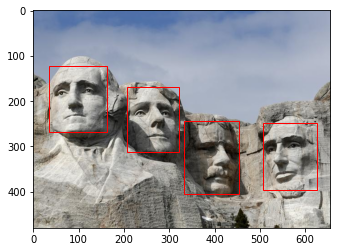

1/1 [==============================] - 0s 10ms/step


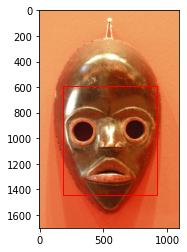

1/1 [==============================] - 0s 10ms/step


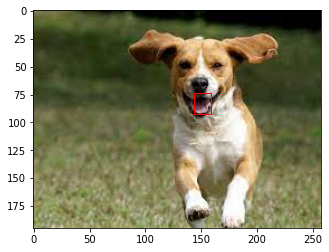

1/1 [==============================] - 0s 10ms/step


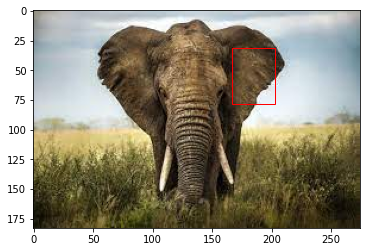

1/1 [==============================] - 0s 10ms/step


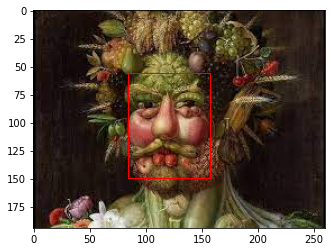

1/1 [==============================] - 0s 12ms/step


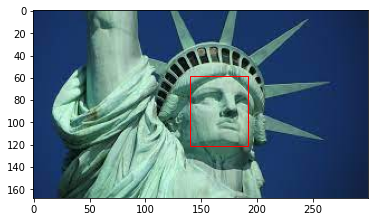

1/1 [==============================] - 0s 9ms/step


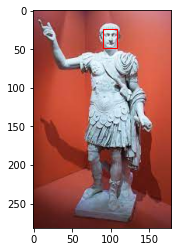

1/1 [==============================] - 0s 10ms/step


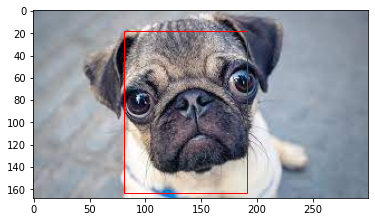

1/1 [==============================] - 0s 11ms/step


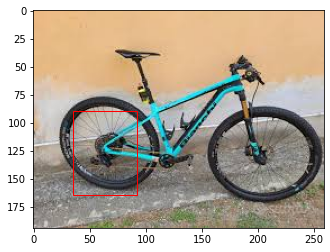

1/1 [==============================] - 0s 9ms/step


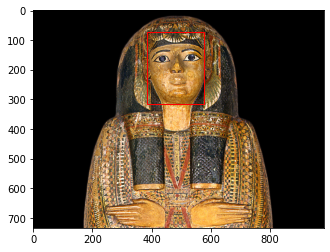

2/2 [==============================] - 0s 3ms/step


In [65]:
for j in NO_PATHS:
    im = pyplot.imread(j)
    result_list = detector.detect_faces(im)
    if len(result_list) == 0:
        t_neg += 1 
    else:
        f_neg += 1
        pyplot.imshow(im)
        ax = pyplot.gca()
        for result in result_list:
            # get coordinates
            x, y, width, height = result['box']
		    # create the shape
            rect = Rectangle((x, y), width, height, fill=False, color='red')
	    	# draw the box
            ax.add_patch(rect)
	    # show the plot
        pyplot.show()

In [64]:
print([t_pos, f_pos])
print([f_neg, t_neg])

[144, 0]
[10, 27]
